<a href="https://colab.research.google.com/github/dycksyn/dycksyn/blob/main/Assessment_Solution_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
from google.colab import files
uploaded = files.upload()

Saving 9bloom_take_home_data.csv to 9bloom_take_home_data.csv


In [4]:
dataset = pd.read_csv('9bloom_take_home_data.csv')

In [15]:
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96393 entries, 0 to 96392
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            96393 non-null  object
 1   order_id        96393 non-null  int64 
 2   transaction_id  96393 non-null  int64 
 3   customer_name   96393 non-null  object
 4   city            96393 non-null  object
 5   States          96393 non-null  object
 6   group           96393 non-null  object
 7   clothing_type   96393 non-null  object
 8   size            96393 non-null  object
 9   quantity        96393 non-null  int64 
 10  profit          96393 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 8.1+ MB


(     date  order_id  transaction_id  customer_name         city  \
 0  1/1/23   1285239         5377334  customer_1709  Springfield   
 1  1/1/23   1285239         5377335  customer_1709  Springfield   
 2  1/1/23   1285239         5377336  customer_1709  Springfield   
 3  1/1/23   1285239         5377337  customer_1709  Springfield   
 4  1/1/23   1285240         5377338  customer_1709  Springfield   
 
           States             group clothing_type         size  quantity  \
 0  Massachusetts  frats_sororities        jersey  extra large        10   
 1  Massachusetts  frats_sororities        jersey  extra small         8   
 2  Massachusetts  frats_sororities        jersey        large        21   
 3  Massachusetts  frats_sororities        jersey       medium        15   
 4  Massachusetts  frats_sororities        jersey        small        18   
 
    profit  
 0     250  
 1     200  
 2     525  
 3     375  
 4     450  ,
 None)

Question 1: Clothing: What are the most popular clothing types? What are the most
expensive clothing items? What clothing type accounts for most of the profit?

In [7]:
#Most Popular Clothing types
Popular_clothing = dataset.groupby(
                                    'clothing_type'
                                    )['quantity'].sum().sort_values(
                                                                    ascending=False
                                                                    )
#Most expensive clothings (assuming higher profits indicates a more expensive item)
Most_expensive_clothing = dataset.groupby(
                                          'clothing_type'
                                          )['profit'].mean().sort_values(
                                                                  ascending=False
                                                                  )
#Most profitable clothing types
Most_profitable_clothing = dataset.groupby(
                                            'clothing_type'
                                            )['profit'].sum().sort_values(
                                                                        ascending=False
                                                                        )

Popular_clothing, Most_expensive_clothing, Most_profitable_clothing

(clothing_type
 t-shirt          644067
 hoodie           608963
 jersey           239770
 fleece jacket    222168
 Name: quantity, dtype: int64,
 clothing_type
 fleece jacket    3291.702884
 hoodie            564.694949
 jersey            289.535333
 t-shirt           218.506799
 Name: profit, dtype: float64,
 clothing_type
 fleece jacket    33325200
 hoodie           17050964
 t-shirt           7728804
 jersey            5994250
 Name: profit, dtype: int64)

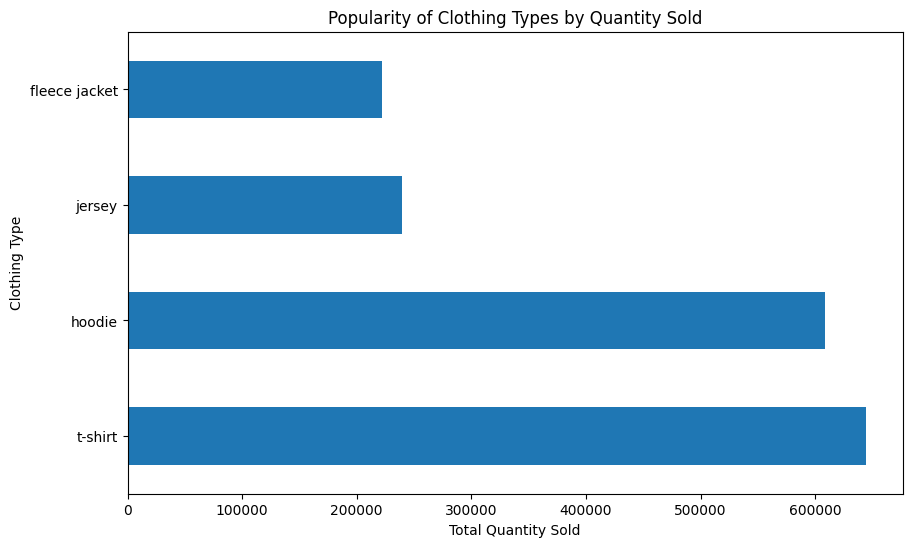

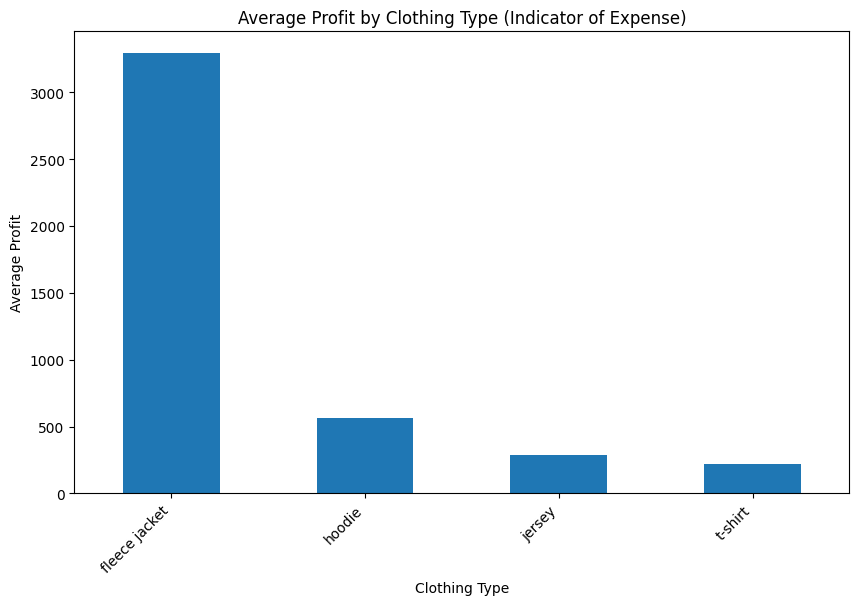

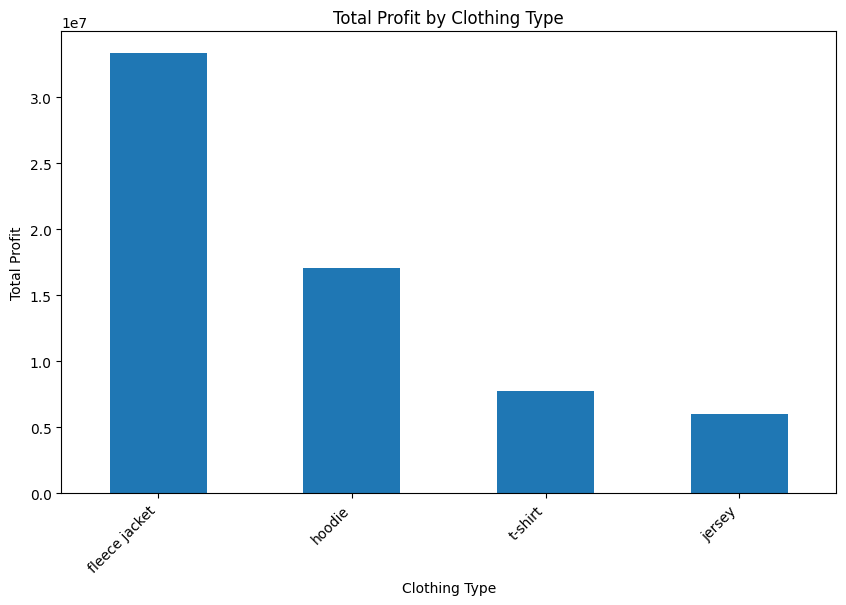

In [8]:
import matplotlib.pyplot as plt

# Assuming Popular_clothing, Most_expensive_clothing, and Most_profitable_clothing are already calculated

# Visualization for Popular Clothing
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
Popular_clothing.plot(kind='barh', title='Popularity of Clothing Types by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Clothing Type')
plt.show()

# Visualization for Most Expensive Clothing
plt.figure(figsize=(10, 6))
Most_expensive_clothing.plot(kind='bar', title='Average Profit by Clothing Type (Indicator of Expense)')
plt.xlabel('Clothing Type')
plt.ylabel('Average Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

# Visualization for Most Profitable Clothing
plt.figure(figsize=(10, 6))
Most_profitable_clothing.plot(kind='bar', title='Total Profit by Clothing Type')
plt.xlabel('Clothing Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
dataset = dataset.rename(columns={'New Englad Cities': 'States'})

Question 2: States: What states order the most clothing? What states generate the most
profit?

In [16]:
#States with the most orders
State_order_quantity = dataset.groupby(
                                'States'
                                )['quantity'].sum().sort_values(
                                                                ascending=False
                                                                )
#States generating the most profit
State_profit = dataset.groupby(
                                'States'
                                )['profit'].sum().sort_values(
                                                                ascending=False
                                                                )
State_order_quantity, State_profit

(States
 Connecticut      412501
 Massachusetts    411870
 Maine            171171
 Vermont          135445
 Rhode Island     134120
 New Hampshire    119725
 Conecticutt      100430
 Masachusets       51763
 Masachusetts      50186
 NewHampshire      35567
 Vermonth          35069
 Rhode Iland       18781
 New Hampsire      17095
 Road Island       16964
 Conneticut         1632
 Rode Island        1022
 Mane                568
 Vermount            543
 New Hampsher        516
 Name: quantity, dtype: int64,
 States
 Massachusetts    15547509
 Connecticut      15270318
 Maine             6486180
 Vermont           5126378
 Rhode Island      4980275
 New Hampshire     4359325
 Conecticutt       3916085
 Masachusets       1929017
 Masachusetts      1715607
 NewHampshire      1435819
 Vermonth          1209202
 Rhode Iland        725301
 New Hampsire       683769
 Road Island        623739
 Conneticut          35542
 Rode Island         21292
 Vermount            12590
 Mane              

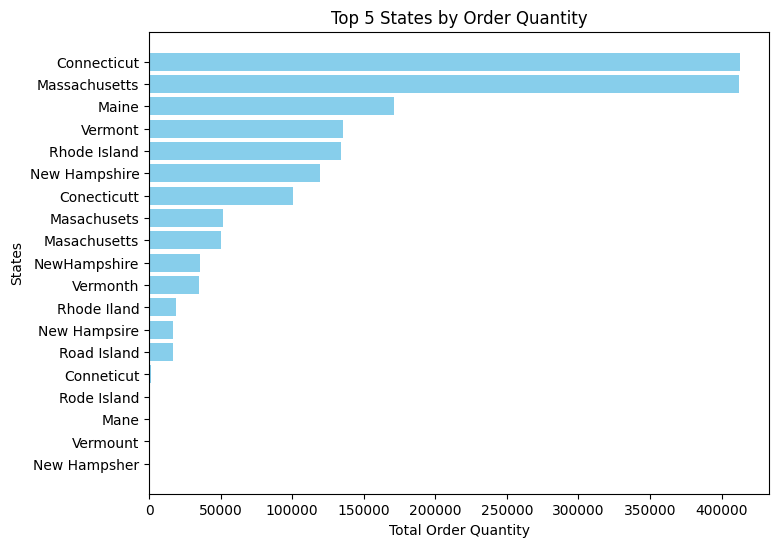

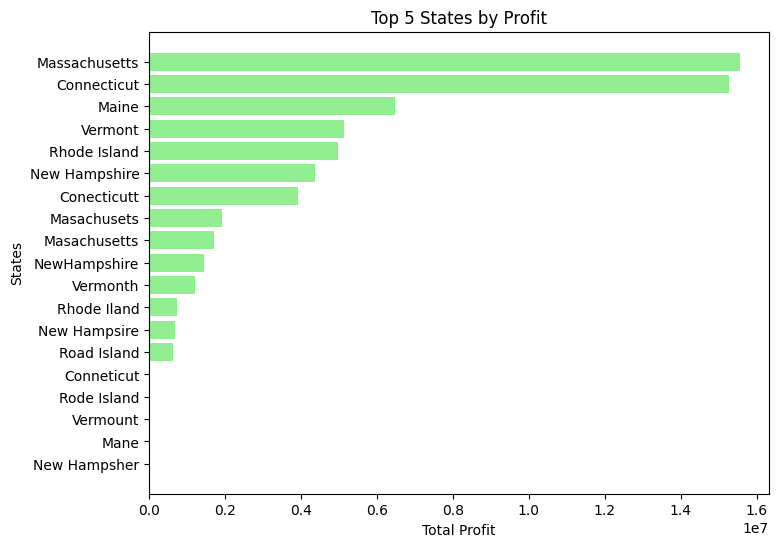

In [17]:
# Chart for State Order Quantity
plt.figure(figsize=(8, 6))
plt.barh(State_order_quantity.index, State_order_quantity.values, color='skyblue')
plt.title('Top 5 States by Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('States')
plt.gca().invert_yaxis()  # Invert y-axis for leaderboard style
plt.show()

# Chart for State Profit
plt.figure(figsize=(8, 6))
plt.barh(State_profit.index, State_profit.values, color='lightgreen')
plt.title('Top 5 States by Profit')
plt.xlabel('Total Profit')
plt.ylabel('States')
plt.gca().invert_yaxis()  # Invert y-axis for leaderboard style
plt.show()

Question 3: Groups: What groups generate the most profit? What groups account for most
of the sales? What clothing types are most popular with customers?

In [18]:
Group_with_most_profit = dataset.groupby(
                                        'group'
                                        )['profit'].sum().sort_values(
                                                                    ascending=False
                                                                    )
Group_with_most_sales = dataset.groupby(
                                        'group'
                                        )['quantity'].sum().sort_values(
                                                                    ascending=False
                                                                    )
Group_with_most_profit, Group_with_most_sales

(group
 corporate           36680744
 charities            8532720
 university_club      6251360
 individual           5920084
 frats_sororities     5258817
 sports_league        1455493
 Name: profit, dtype: int64,
 group
 corporate           572973
 charities           429432
 individual          273353
 frats_sororities    242814
 university_club     117694
 sports_league        78702
 Name: quantity, dtype: int64)

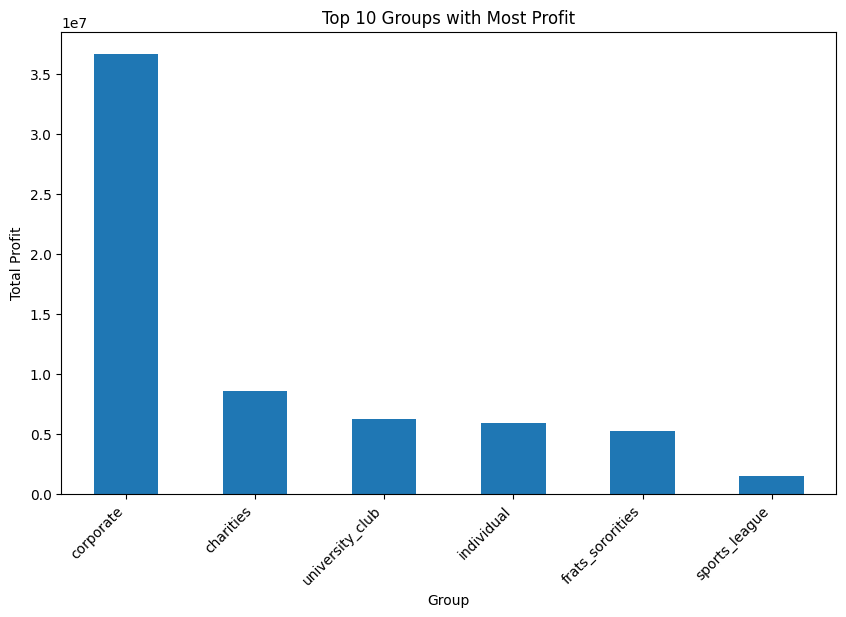

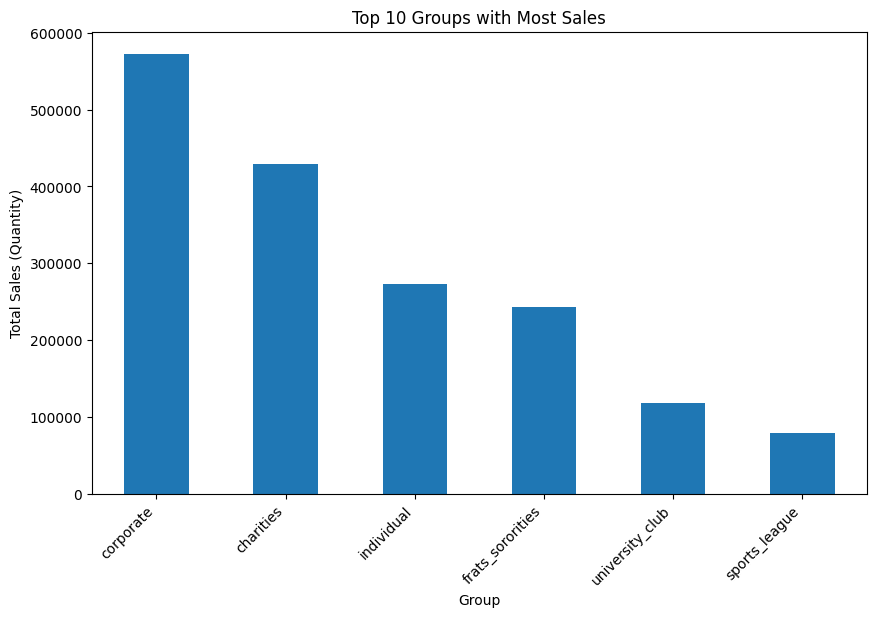

In [19]:
# Visualization for Group with Most Profit
plt.figure(figsize=(10, 6))
Group_with_most_profit.head(10).plot(kind='bar', title='Top 10 Groups with Most Profit')  # Showing top 10 for better visualization
plt.xlabel('Group')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization for Group with Most Sales
plt.figure(figsize=(10, 6))
Group_with_most_sales.head(10).plot(kind='bar', title='Top 10 Groups with Most Sales')  # Showing top 10 for better visualization
plt.xlabel('Group')
plt.ylabel('Total Sales (Quantity)')
plt.xticks(rotation=45, ha='right')
plt.show()